In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/Users/maengjuseog/Desktop/3-2/DeepLearningClass/Data/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Columns: 272 entries, T_xacc_mean to people
dtypes: float64(270), object(2)
memory usage: 18.9+ MB


In [4]:
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [5]:
df.isnull().values.any()

False

시계열 데이터로 만들어주기

In [6]:
activity_count = df.groupby(['people', 'activity']).size().reset_index(name='count')

print(activity_count)

    people                 activity  count
0       p1          ascendingStairs     60
1       p1               basketBall     60
2       p1             crossTrainer     60
3       p1        cyclingHorizontal     60
4       p1          cyclingVertical     60
..     ...                      ...    ...
147     p8  standingInElevatorStill     60
148     p8                  stepper     60
149     p8               walkingLot     60
150     p8     walkingTreadmillFlat     60
151     p8  walkingTreadmillIncline     60

[152 rows x 3 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder

input = df.drop(['activity', 'people'], axis=1).values
target = df['activity'].values

le = LabelEncoder()
target = le.fit_transform(target)

# 인코딩 된 target 확인
target

array([12, 12, 12, ...,  1,  1,  1])

In [8]:
# 시계열 데이터 생성 함수 (활동이 동일한 시퀀스에 대해서만 입력과 타겟을 나눔)
def create_sequences_and_targets(data, target, sequence_length):
    inputs = []
    targets = []

    for i in range(len(data) - sequence_length):
        # 해당 시퀀스의 타겟이 동일한 활동인 경우에만 사용
        if len(set(target[i:i + sequence_length])) == 1:  # 시퀀스 내의 타겟이 모두 동일한지 확인
            seq = data[i:i + sequence_length]  # 입력 시퀀스
            inputs.append(seq)
            targets.append(target[i])  # 시퀀스의 첫 번째 값의 타겟을 사용

    return np.array(inputs), np.array(targets)

# 시퀀스 길이 설정
sequence_length = 60

# 시퀀스와 타겟 생성
input, target = create_sequences_and_targets(input, target, sequence_length)

# 생성된 시퀀스 데이터 크기 확인
print(f"입력 시퀀스 크기: {input.shape}")
print(f"타겟 크기: {target.shape}")

입력 시퀀스 크기: (7998, 60, 270)
타겟 크기: (7998,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(input,target,test_size=0.2)

# StandardScaler는 2차원 배열을 받아야하기 때문에 현재 3차원인 시계열 데이터에는 바로 적용 불가
# 시계열 데이터를 2차원으로 reshape 하는 과정이 필요
train_input_reshaped = train_input.reshape(-1, train_input.shape[-1])  # (샘플 수 * 시퀀스 길이, 특성 수)
test_input_reshaped = test_input.reshape(-1, test_input.shape[-1])    # 같은 방식으로 변환

# StandardScaler 적용
ss = StandardScaler()
train_input_scaled = ss.fit_transform(train_input_reshaped)
test_input_scaled = ss.transform(test_input_reshaped)

# 다시 3차원으로 변환 (원래의 형태로 복원)
train_input_scaled = train_input_scaled.reshape(train_input.shape)
test_input_scaled = test_input_scaled.reshape(test_input.shape)

# 결과 확인
print(f"훈련 데이터 크기: {train_input_scaled.shape}")
print(f"테스트 데이터 크기: {test_input_scaled.shape}")
print(f"훈련 타겟 크기: {train_target.shape}")
print(f"테스트 타겟 크기: {test_target.shape}")

훈련 데이터 크기: (6398, 60, 270)
테스트 데이터 크기: (1600, 60, 270)
훈련 타겟 크기: (6398,)
테스트 타겟 크기: (1600,)


트랜스포머 인코더 모델 구조

입력 임베딩: 입력 데이터를 적절한 차원으로 임베딩.

포지셔널 인코딩: 입력 데이터가 순차적인 관계를 학습할 수 있도록 순서 정보를 추가.

멀티헤드 어텐션: 입력 데이터 간의 상관관계를 학습.

피드 포워드 네트워크: 학습된 정보를 처리하는 층.

최종 분류 층: 입력에 대한 예측을 수행하는 층.

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.models import Model

# 트랜스포머 인코더 블록을 함수로 정의
def transformer_encoder(inputs, embed_dim, num_heads, ff_dim, dropout=0.1):
    # 멀티헤드 어텐션
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)

    # 잔차 연결 + Layer Normalization
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    # 피드포워드 네트워크
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dense(embed_dim)(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)

    # 잔차 연결 + Layer Normalization
    return LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# 트랜스포머 인코더 모델 함수 정의
def build_transformer_model(input_shape, num_classes, embed_dim=64, num_heads=4, ff_dim=128, num_layers=1, dropout=0.1):
    inputs = Input(shape=input_shape)

    # 인코더 임베딩 층
    x = Dense(embed_dim)(inputs)

    # 여러 트랜스포머 인코더 블록을 쌓음
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # 분류를 위해 글로벌 평균 풀링
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)

    # Fully Connected Layer
    x = Dense(64, activation="relu")(x)
    x = Dropout(dropout)(x)

    # 출력층 (분류 문제: Softmax 사용)
    outputs = Dense(num_classes, activation="softmax")(x)

    # 모델 정의
    model = Model(inputs, outputs)
    return model

In [11]:
input_shape = (train_input.shape[1], train_input.shape[2])  # 시퀀스 길이, 피처 수
num_classes = len(np.unique(train_target))  # 클래스 수
dropout = 0.5 # 드롭아웃 비율


# 모델 빌드
model = build_transformer_model(input_shape, num_classes,dropout=dropout,num_layers=2)

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 60, 270)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 60, 64)    │     17,344 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 64)    │     66,368 │ dense[0][0],      │
│ (MultiHeadAttentio… │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 60, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 64)    │          0 │ dense[0][0],      │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 60, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 60, 64)    │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 60, 64)    │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 60, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 60, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 60, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 60, 64)    │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 60, 64)    │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 60, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 64)    │        128 │ add_3[0][0]     

 Total params: 189,139 (738.82 KB)

 Trainable params: 189,139 (738.82 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(train_input, train_target, validation_data=(test_input, test_target), epochs=50, batch_size=32)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.3651 - loss: 2.0712 - val_accuracy: 0.9769 - val_loss: 0.0888
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.8740 - loss: 0.4063 - val_accuracy: 0.9994 - val_loss: 0.0091
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9570 - loss: 0.1820 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9615 - loss: 0.1265 - val_accuracy: 1.0000 - val_loss: 4.7418e-04
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9740 - loss: 0.0926 - val_accuracy: 0.9781 - val_loss: 0.0878
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9667 - loss: 0.1199 - val_accuracy: 1.0000 - val_loss: 1.8809e-04
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9839 - loss: 0.0565 - val_accuracy: 1.0000 - val_loss: 2.0778e-05
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9779 - los

Text(0, 0.5, 'Loss')

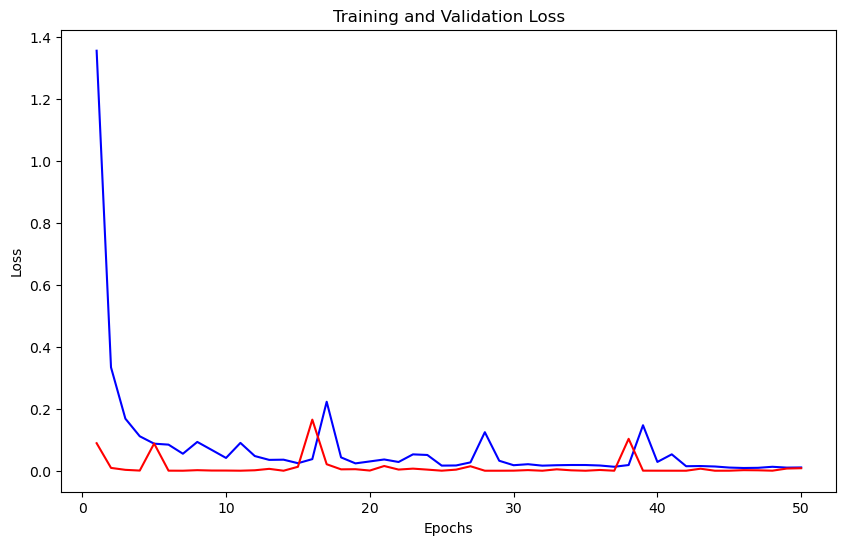

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

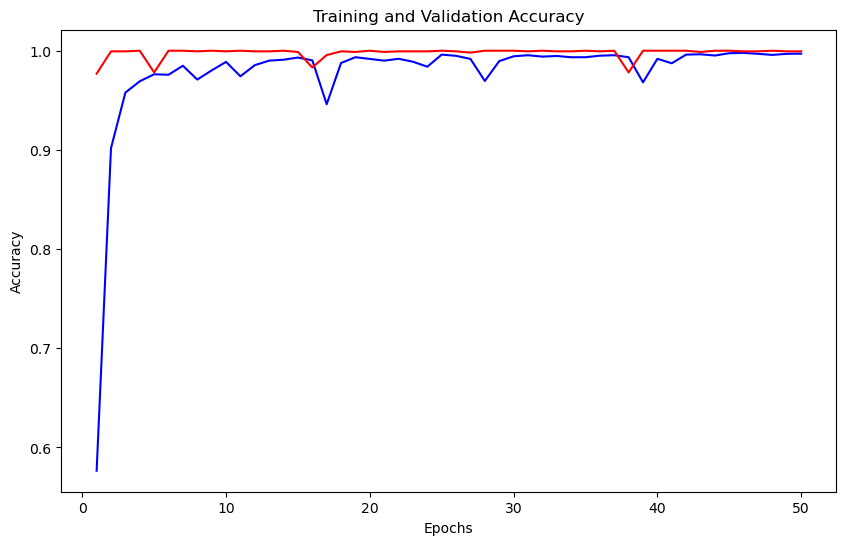

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [15]:
model.evaluate(test_input, test_target)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9986 - loss: 0.0177


[0.008059711195528507, 0.9993749856948853]

In [16]:
input_shape = (train_input.shape[1], train_input.shape[2])  # 시퀀스 길이, 피처 수
num_classes = len(np.unique(train_target))  # 클래스 수
dropout = 0.5 # 드롭아웃 비율
embed_dim = 16
num_heads = 2
ff_dim = 32
num_layers = 1


# 모델 빌드
model2 = build_transformer_model(input_shape, num_classes,dropout=dropout,num_layers=num_layers
                                 ,embed_dim=embed_dim,num_heads=num_heads,ff_dim=ff_dim)

# 모델 컴파일
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 60, 270)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 60, 16)    │      4,336 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 16)    │      2,160 │ dense_7[0][0],    │
│ (MultiHeadAttentio… │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 60, 16)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 60, 16)    │          0 │ dense_7[0][0],    │
│                     │                   │            │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 16)    │         32 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 60, 32)    │        544 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 60, 16)    │        528 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 60, 16)    │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 60, 16)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 16)    │         32 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 16)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      1,088 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 19)        │      1,235 │ dropout_12[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,955 (38.89 KB)

 Trainable params: 9,955 (38.89 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history2 = model2.fit(train_input, train_target, validation_data=(test_input, test_target), epochs=20, batch_size=32)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1667 - loss: 2.7153 - val_accuracy: 0.8562 - val_loss: 0.9400
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5296 - loss: 1.4229 - val_accuracy: 0.9706 - val_loss: 0.3482
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6646 - loss: 0.9660 - val_accuracy: 0.9812 - val_loss: 0.1838
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7327 - loss: 0.7346 - val_accuracy: 0.9931 - val_loss: 0.0898
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7773 - loss: 0.6385 - val_accuracy: 0.9975 - val_loss: 0.0508
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7935 - loss: 0.5666 - val_accuracy: 0.9987 - val_loss: 0.0314
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8197 - loss: 0.5042 - val_accuracy: 0.9975 - val_loss: 0.0196
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8217 - loss: 0.4891 - val_accuracy: 1.

Text(0, 0.5, 'Loss')

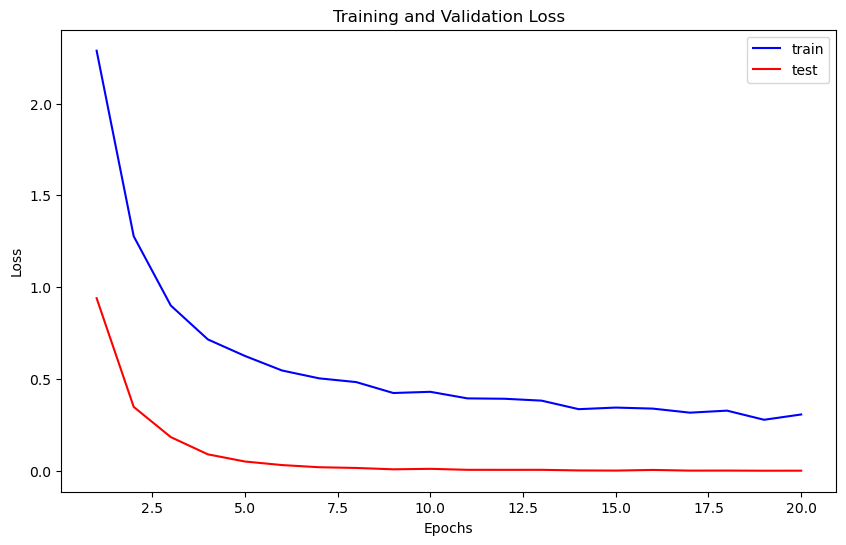

In [18]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

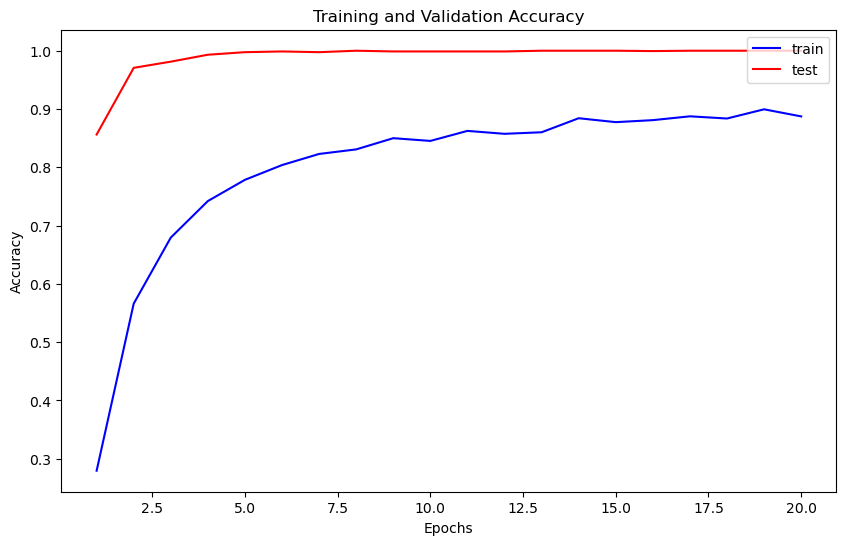

In [19]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [21]:
model2.evaluate(test_input, test_target)
#과대적합

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.1141e-04


[0.000884931709151715, 1.0]

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


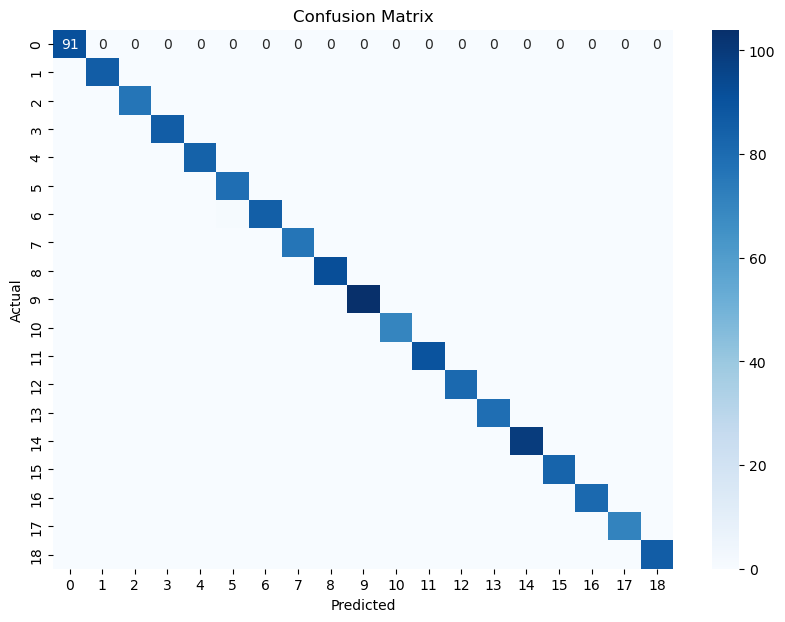

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        84
           5       0.99      1.00      0.99        79
           6       1.00      0.99      0.99        86
           7       1.00      1.00      1.00        76
           8       1.00      1.00      1.00        92
           9       1.00      1.00      1.00       104
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        90
          12       1.00      1.00      1.00        81
          13       1.00      1.00      1.00        79
          14       1.00      1.00      1.00        99
          15       1.00      1.00      1.00        83
          16       1.00      1.00      1.00        81
          17       1.00    

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_input)
y_pred = np.argmax(model.predict(test_input), axis=-1)

# 혼동 행렬
cm = confusion_matrix(test_target, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 성능 보고서
print(classification_report(test_target, y_pred))